<a href="https://colab.research.google.com/github/JoshiGaurav11/SelfLearningMLforChem/blob/main/ML_methods/MultipleLinearRegression_andSolubilityProblem_Jensen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

$ y_{predicted}=b.1 + wX $

$ \quad\quad\quad\   = w_0X_0 + w_1X_1 $
              
$ \quad\quad\quad\ =( w_0 \quad w_1 ). (X_0 \quad X_1 ) $
              
$ \quad\quad\quad\ =( b \quad w ). ( 1 \quad X ) $
              
$ \quad\quad\quad\ =w.Xp (dot\;\;product\;\;of\;\;vectors) $
              
$ \quad\quad\quad\ =w @ Xp \quad in \;\; python $

In python * does element-wise multiplication (Hadamard Product)

$ y_{predicted} = w_0X' + w_1 X_1 $

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Multiple linear Regression
data = [(0,1), (1,3), (2,2), (3,5), (4,7), (5,8), (6,8), (7,9), (8,10), (9,12), (10,14), (11,16)]
df=pd.DataFrame(data, columns=['x','y'])
X=df['x']
Y=df['y']
Y=np.c_[Y].T #change series to matrix
ones=np.ones(len(X))
Xp=np.c_[ones,X]
w=2*np.random.rand(2) - 1 #np.random.rand(2) generates random between 0 and 1 of a dimension 1*2; generate random w between -1 and 1
epochs=1000
learning_rate=0.01
for epoch in range(epochs):
  y_predicted=w @ Xp.T
  error=Y-y_predicted
  l2=0.5*(np.mean((error)**2))
  gradient=-(1/(len(X)))* error @ Xp
  w=w-learning_rate*gradient
  if epoch%(epochs/10)==0:
    print(epoch,l2)
print(w)
print(error.shape,w.shape,Xp.shape,Y.shape,y_predicted.shape)

0 23.57975896326769
100 0.33428400937827335
200 0.3339819122788043
300 0.3338087421306735
400 0.33370947636395076
500 0.33365257456794545
600 0.3336199569345408
700 0.33360125963351317
800 0.33359054183981596
900 0.3335843981134265
[[0.89165039 1.27698341]]
(1, 12) (1, 2) (12, 2) (1, 12) (1, 12)


In [ ]:
%%bash
wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2024-11-27 08:20:41--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv’

     0K .......... .......... .......... .......... .......... 52% 6.16M 0s
    50K .......... .......... .......... .......... ....      100% 39.6M=0.009s

2024-11-27 08:20:41 (10.2 MB/s) - ‘delaney-processed.csv’ saved [96699/96699]



In [ ]:
data = pd.read_csv('delaney-processed.csv')
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [ ]:
print(list(data))
data.shape

['Compound ID', 'ESOL predicted log solubility in mols per litre', 'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area', 'measured log solubility in mols per litre', 'smiles']


(1128, 10)

In [ ]:
X=data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']]
Y=data[['measured log solubility in mols per litre']]
X.shape, Y.shape
Xp.shape

(12, 2)

In [ ]:
# Multiple linear Regression
X=data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']]
Y=data[['measured log solubility in mols per litre']]
Y=np.c_[Y].T #change series to matrix
N=len(X)
ones=np.ones(N)
Xp=np.c_[ones,X]
np.random.seed(1) #fix the randomness
w=2*np.random.rand(7) - 1 #np.random.rand(2) generates random between 0 and 1 of a dimension 1*2; generate random w between -1 and 1
epochs=400000
learning_rate=0.000035
for epoch in range(epochs):
  y_predicted=w @ Xp.T
  error=Y-y_predicted
  l2=0.5*(np.mean((error)**2))
  gradient=-(1/(len(X)))* error @ Xp
  w=w-learning_rate*gradient
  if epoch%(epochs/10)==0:
    print(epoch,l2)
print(w)
print(error.shape,w.shape,Xp.shape,Y.shape,y_predicted.shape)

0 32076.618752791957
40000 0.7436475451985186
80000 0.7074100061736552
120000 0.6978363124127639
160000 0.6950958774281222
200000 0.6941953484862933
240000 0.693810035438751
280000 0.693576126758329
320000 0.6933913910598976
360000 0.6932265398040581
[[-0.45240902 -0.14617513 -0.01302094  0.07388751 -0.45985647 -0.14970686
   0.03207482]]
(1, 1128) (1, 7) (1128, 7) (1, 1128) (1, 1128)


In [ ]:
#machine learning code for MLR
from sklearn.linear_model import LinearRegression
X=data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']]
Y=data[['measured log solubility in mols per litre']]
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)
y_predicted= reg.predict(X)
error=Y-y_predicted
l2=0.5*(np.mean((error)**2))
print(l2)
# 1. Find the index of the row with the maximum absolute error
mae=np.abs(Y-y_predicted)
smiles=data['smiles']
error_with_smiles=np.c_[mae,smiles]
#print(error_with_smiles.shape)
error_with_smiles=pd.DataFrame(error_with_smiles, columns=['x','y'])
#print(type(error_with_smiles))
max_error_mol=error_with_smiles.sort_values(by=['x']).tail(10)


[[-0.49921068 -0.01362162  0.07281654 -0.41338402 -0.14337233  0.03159255]]
[-0.00934896]
0.6901456049984575


In [ ]:
!pip install rdkit-pypi

In [ ]:
z=np.c_[max_error_mol['y']]
z # it gives a 2D array, therefore .values is considered below for generation of molfromsmiles.

array([['ClC1(C2(Cl)C3(Cl)C4(Cl)C5(Cl)C1(Cl)C3(Cl)Cl)C5(Cl)C(Cl)(Cl)C24Cl'],
       ['OC(CC(c1ccccc1)c3c(O)c2ccccc2oc3=O)c4ccc(cc4)c5ccc(Br)cc5 '],
       ['CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CCC5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C '],
       ['ClC1(C(=O)C2(Cl)C3(Cl)C14Cl)C5(Cl)C2(Cl)C3(Cl)C(Cl)(Cl)C45Cl'],
       ['Cc1cc(=O)n(c2ccccc2)n1C'],
       ['OC(C1=CC2C5C(C1C2=C(c3ccccc3)c4ccccn4)C(=O)NC5=O)(c6ccccc6)c7ccccn7 '],
       ['CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl'],
       ['O=c2[nH]c(=O)c1[nH]c(=O)[nH]c1[nH]2 '],
       ['CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CC(O)C5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C '],
       ['CNC(=O)C(C)SCCSP(=O)(OC)(OC)']], dtype=object)

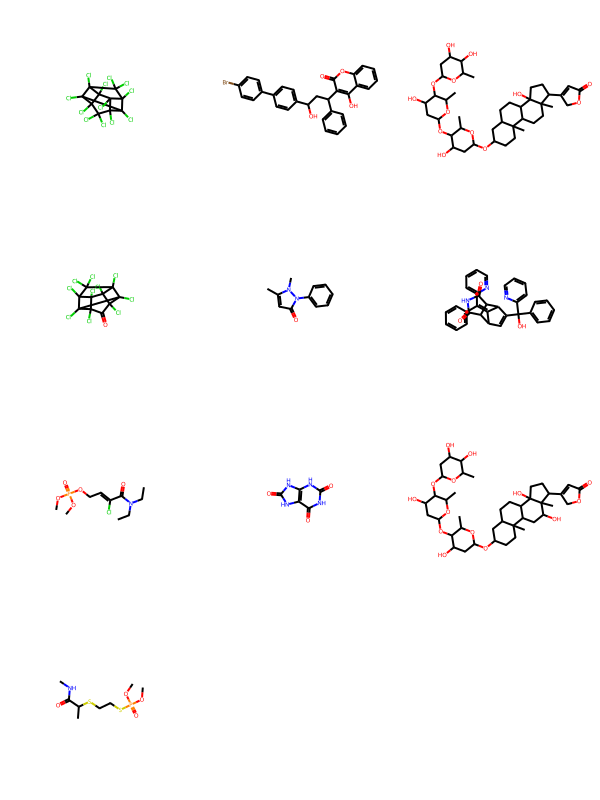

In [ ]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
test_smiles=max_error_mol['y'].values
#Chem.MolFromSmiles('OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3')
#test_smiles
test_mols= [Chem.MolFromSmiles(smi) for smi in test_smiles]
Draw.MolsToGridImage(test_mols, useSVG=False)